<h2> Predictive Analytics on NYC Motor Collisions </h2>



 <b>Deliverable 1 : Annotated Notebooks </b>
 <br>
 <b>Deliverable 2: <a href = 'https://anushkasandesara.medium.com/predictive-analytics-on-nyc-collision-data-9f06c94140f2?source=friends_link&sk=c5b083a0fba3803d5b591518918db9f1'>Medium Blog</a> </b> 
 



<b> Motivation </b>

A New York Times [article](https://www.nytimes.com/2021/09/30/nyregion/traffic-deaths-nyc.html) reported that streets in New York have grown more precarious because deaths and fatalities due to traffic collisions have risen 10.5 percent to 8,730 in the first 3 months of 2021 from 7,900 deaths in the same period in 2020. As New York city is home to more than 8 million people and approximately 45 million people visit every year the traffic will surge which can cause more collisions. The objective of this project is to <b>gather insights, perform comprehensive exploratory data analysis to understand the relationship between various features of the dataset and use them to make better machine learning predictive models.</b>

<p align="center">
  <img src="https://media.giphy.com/media/8uiZLn37DZIXu/giphy.gif" alt="animated" />
</p>


<b> Dataset </b>

The dataset contains information about collisions reported in NYC by the police department. The dataset contains 1.84M rows and 29 columns latest updated as of 7th November. Based on our analysis from the website the dataset contains columns like <b>crash date, time, location, borough, collision id, number of persons injured, number of pedestrians injured, number of pedestrians killed, number of cyclists killed, number of cyclists injured, contributing factors behind the collision, vehicle types and many other relevant features.</b> Furthermore, we scraped weather data from this [website](https://www.wunderground.com) which contains information on <b>temperature, wind, humidity, windspeed, wind gust, pressure, precipitation and condition.</b>



<b> Google Drive <a href = 'https://drive.google.com/drive/folders/1WNSEIY1K3WzlmpFx6l89S3em4XkTiKId?usp=sharing'>Link</a> to Access our Collision Data and Scraped Weather Data </b>



<b> Research Questions and Hypotheses we intend to analyze</b>
- Most important factors contributing to accidents
- Proportion of deaths and injuries
- Trends on holidays and special occasions
- Relationship between time when the collision occur to factors contributing it
- Types of vehicles involved
- Daily, weekly, monthly trends? How do trends change over time? What is the most unsafe time to drive in a day?
- Most collision-prone regions/streets/boroughs
- Correlation between weather condition and chances of accident


<h4>Importing Libraries</h4>

In [29]:
# pip install pandasql

In [1]:
import pandas as pd
import pandasql as ps
import seaborn as sns
from datetime import datetime, timedelta
import re
import matplotlib.pyplot as plt

<b>Loading Collision and Weather Data in Dataframe</b>

In [3]:
# collision_csv_file_path="/content/drive/Shareddrives/CIS545 PROJECT/Motor_Vehicle_Collisions_-_Crashes.csv"#"Motor_Vehicle_Collisions_-_Crashes.csv"
collision_csv_file_path="Motor_Vehicle_Collisions_-_Crashes.csv"
df_c=pd.read_csv(collision_csv_file_path,low_memory=False)
#df_w=pd.read_csv("/content/drive/Shareddrives/CIS545 PROJECT/weather_data.csv",low_memory=False)#("weather_data.csv",low_memory=False)
df_w=pd.read_csv("weather_data.csv",low_memory=False)#("weather_data.csv",low_memory=False)


<h5> Functions for Datetime processing for both the datasets</h5>

In [4]:
#rounding_type : 0 - No rounding (default)
#rounding_type : 1 - floor to nearest hour 
#rounding_type : 2 - round to nearest hour
def convert_string_datetime(datetime_string,datetime_format,rounding_type): #Covnerting datetime string to rounded datetime to nearest hour
    datetime_string=datetime_string.strip()
    datetime_f = datetime.strptime(datetime_string,datetime_format)
    if(rounding_type == 1):
        #Flooring to nearest hour
        datetime_f = datetime_f.replace(second = 0, microsecond = 0, minute = 0, hour = datetime_f.hour) 
    elif (rounding_type==2):
        #Rounding to nearest hour
        datetime_f = datetime_f.replace(second = 0, microsecond = 0, minute = 0, hour = datetime_f.hour) + timedelta(hours = datetime_f.minute // 31)
    return datetime_f

#Taking date and time cols to convert compose datetime string and thereafter returning normalized datetime string
def normalized_datetime(row_var,date_col,time_col,datetime_format,rounding_type=0): 
    datetime_string = str(row_var[date_col]) + " " + str(row_var[time_col])
    datetime_f = convert_string_datetime(datetime_string, datetime_format,rounding_type) #Function to convert datetime string to rounded datetime
    return datetime_f

<h1> PART 1: Exploring Structure of NYC Collision Dataset </h1>

In [5]:
df_c.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,04/14/2021,5:32,NaN,NaN,NaN,NaN,NaN,BRONX WHITESTONE BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4407480,Sedan,Sedan,NaN,NaN,NaN
1,04/13/2021,21:35,BROOKLYN,11217,40.68358,-73.97617,"(40.68358, -73.97617)",NaN,NaN,620 ATLANTIC AVENUE,...,NaN,NaN,NaN,NaN,4407147,Sedan,NaN,NaN,NaN,NaN
2,04/15/2021,16:15,NaN,NaN,NaN,NaN,NaN,HUTCHINSON RIVER PARKWAY,NaN,NaN,...,NaN,NaN,NaN,NaN,4407665,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
3,04/13/2021,16:00,BROOKLYN,11222,NaN,NaN,NaN,VANDERVORT AVENUE,ANTHONY STREET,NaN,...,Unspecified,NaN,NaN,NaN,4407811,Sedan,NaN,NaN,NaN,NaN
4,04/12/2021,8:25,NaN,NaN,0.00000,0.00000,"(0.0, 0.0)",EDSON AVENUE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4406885,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN


<b> Checking Dtypes of Each Column </b>

In [6]:
df_c.dtypes

CRASH DATE                        object
CRASH TIME                        object
BOROUGH                           object
ZIP CODE                          object
LATITUDE                         float64
LONGITUDE                        float64
LOCATION                          object
ON STREET NAME                    object
CROSS STREET NAME                 object
OFF STREET NAME                   object
NUMBER OF PERSONS INJURED        float64
NUMBER OF PERSONS KILLED         float64
NUMBER OF PEDESTRIANS INJURED      int64
NUMBER OF PEDESTRIANS KILLED       int64
NUMBER OF CYCLIST INJURED          int64
NUMBER OF CYCLIST KILLED           int64
NUMBER OF MOTORIST INJURED         int64
NUMBER OF MOTORIST KILLED          int64
CONTRIBUTING FACTOR VEHICLE 1     object
CONTRIBUTING FACTOR VEHICLE 2     object
CONTRIBUTING FACTOR VEHICLE 3     object
CONTRIBUTING FACTOR VEHICLE 4     object
CONTRIBUTING FACTOR VEHICLE 5     object
COLLISION_ID                       int64
VEHICLE TYPE COD

<b>Statistics of the dataframe</b>

In [7]:
df_c.describe().round(2)

,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID
count,1624270.00,1624270.00,1839238.00,1839225.00,1839256.00,1839256.00,1839256.00,1839256.00,1839256.00,1839256.00,1839256.00
mean,40.67,-73.83,0.28,0.00,0.05,0.00,0.02,0.00,0.20,0.00,2975457.97
std,1.45,2.83,0.68,0.04,0.23,0.03,0.15,0.01,0.64,0.03,1502568.55
min,0.00,-201.36,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.00
25%,40.67,-73.98,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2976397.75
50%,40.72,-73.93,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3555807.50
75%,40.77,-73.87,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4015864.25
max,43.34,0.00,43.00,8.00,27.00,6.00,4.00,2.00,43.00,5.00,4476181.00


<b> Finding Null Values in Each Column </b>

In [8]:
df_c.isna().sum()

CRASH DATE                             0
CRASH TIME                             0
BOROUGH                           568098
ZIP CODE                          568320
LATITUDE                          214986
LONGITUDE                         214986
LOCATION                          214986
ON STREET NAME                    375915
CROSS STREET NAME                 661099
OFF STREET NAME                  1555710
NUMBER OF PERSONS INJURED             18
NUMBER OF PERSONS KILLED              31
NUMBER OF PEDESTRIANS INJURED          0
NUMBER OF PEDESTRIANS KILLED           0
NUMBER OF CYCLIST INJURED              0
NUMBER OF CYCLIST KILLED               0
NUMBER OF MOTORIST INJURED             0
NUMBER OF MOTORIST KILLED              0
CONTRIBUTING FACTOR VEHICLE 1       5306
CONTRIBUTING FACTOR VEHICLE 2     266317
CONTRIBUTING FACTOR VEHICLE 3    1713307
CONTRIBUTING FACTOR VEHICLE 4    1811717
CONTRIBUTING FACTOR VEHICLE 5    1831954
COLLISION_ID                           0
VEHICLE TYPE COD

In [9]:
#Add description of each col and the reason for deleting the columns
useful_cols=['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION','ON STREET NAME','CROSS STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2','COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2']
df_c_1=df_c[useful_cols]


drop_null_cols=['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE','CONTRIBUTING FACTOR VEHICLE 1','NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED','VEHICLE TYPE CODE 1']
df_c_2=df_c_1.dropna(subset=drop_null_cols).reset_index(drop=True)
print("Rows with non-null values in important columns:",df_c_2.shape[0])

Rows with non-null values in important columns: 1228880


<b>Correlation Heat Map- To check correlation among columns of collision data</b>

<AxesSubplot:>

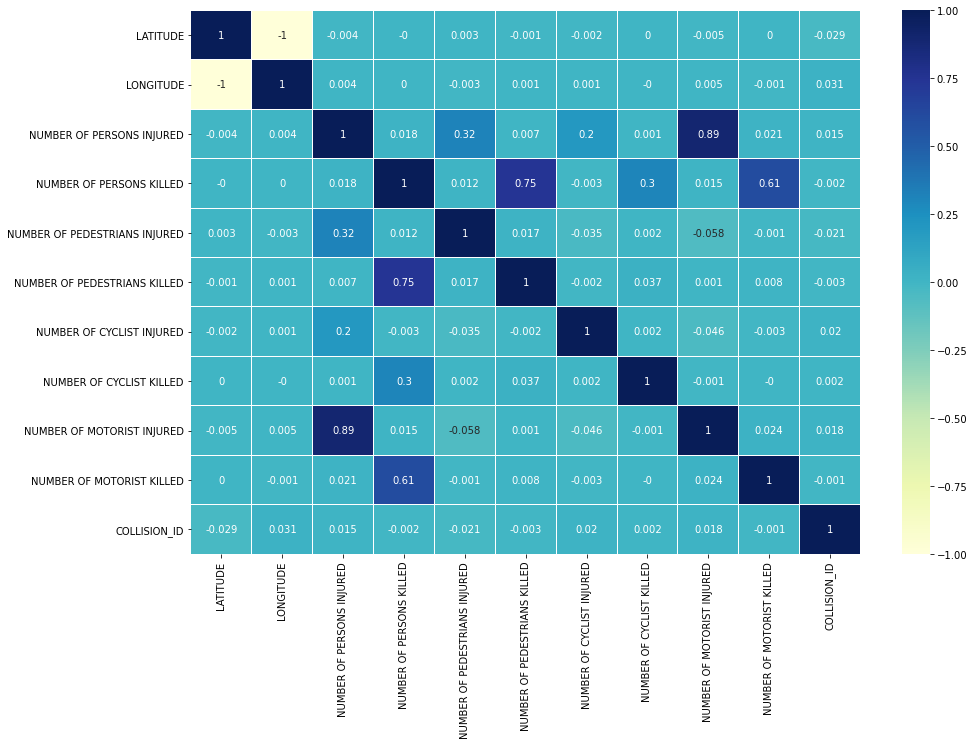

In [10]:
plt.subplots(figsize=(15,10))
sns.heatmap(df_c_2.corr().round(3),linewidths=.01,annot=True,vmin=-1,vmax=1,cmap="YlGnBu")

In [11]:
df_c_2.isna().sum()

CRASH DATE                            0
CRASH TIME                            0
BOROUGH                               0
ZIP CODE                              0
LATITUDE                              0
LONGITUDE                             0
LOCATION                              0
ON STREET NAME                   243691
CROSS STREET NAME                244173
NUMBER OF PERSONS INJURED             0
NUMBER OF PERSONS KILLED              0
NUMBER OF PEDESTRIANS INJURED         0
NUMBER OF PEDESTRIANS KILLED          0
NUMBER OF CYCLIST INJURED             0
NUMBER OF CYCLIST KILLED              0
NUMBER OF MOTORIST INJURED            0
NUMBER OF MOTORIST KILLED             0
CONTRIBUTING FACTOR VEHICLE 1         0
CONTRIBUTING FACTOR VEHICLE 2    182116
COLLISION_ID                          0
VEHICLE TYPE CODE 1                   0
VEHICLE TYPE CODE 2              213515
dtype: int64

<b> Converting To Python Datetime format and flooring it to nearest hour for further analysis </b>

In [12]:
collision_date_col = 'CRASH DATE'
collision_time_col = 'CRASH TIME'
collision_dt_format="%m/%d/%Y %H:%M"
df_c_2['Collision_Datetime']=df_c_2.apply(lambda x:normalized_datetime(x,collision_date_col,collision_time_col,collision_dt_format,1),axis=1)
df_c_2

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,NUMBER OF PERSONS INJURED,...,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,Collision_Datetime
0,04/13/2021,21:35,BROOKLYN,11217,40.683580,-73.976170,"(40.68358, -73.97617)",NaN,NaN,1.0,...,0,0,0,0,Unspecified,NaN,4407147,Sedan,NaN,2021-04-13 21:00:00
1,05/21/2019,22:50,BROOKLYN,11201,40.697540,-73.983120,"(40.69754, -73.98312)",GOLD STREET,CONCORD STREET,0.0,...,0,0,0,0,Passing or Lane Usage Improper,Unspecified,4136992,�MBU,Taxi,2019-05-21 22:00:00
2,02/26/2021,14:50,BRONX,10461,40.843464,-73.836000,"(40.843464, -73.836)",NaN,NaN,0.0,...,0,0,0,0,Unspecified,Unspecified,4395664,Station Wagon/Sport Utility Vehicle,NaN,2021-02-26 14:00:00
3,03/31/2021,22:20,BROOKLYN,11234,40.626457,-73.918000,"(40.626457, -73.918)",RALPH AVENUE,AVENUE K,1.0,...,0,0,1,0,Driver Inexperience,Unspecified,4403773,Sedan,Sedan,2021-03-31 22:00:00
4,04/06/2021,22:58,STATEN ISLAND,10312,40.526894,-74.167280,"(40.526894, -74.16728)",BARCLAY AVENUE,HYLAN BOULEVARD,7.0,...,0,0,7,0,Failure to Yield Right-of-Way,Unsafe Speed,4405244,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,2021-04-06 22:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1228875,07/07/2012,17:35,BROOKLYN,11235,40.575802,-73.961137,"(40.5758019, -73.9611371)",BRIGHTON 6 STREET,BRIGHTWATER COURT,0.0,...,0,0,0,0,Unspecified,Unspecified,113584,PASSENGER VEHICLE,PASSENGER VEHICLE,2012-07-07 17:00:00
1228876,07/06/2012,15:09,MANHATTAN,10035,40.801235,-73.941815,"(40.8012354, -73.9418153)",EAST 119 STREET,PARK AVENUE,0.0,...,0,0,0,0,Unspecified,Unspecified,59654,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,2012-07-06 15:00:00
1228877,07/03/2012,17:30,QUEENS,11102,40.774711,-73.933386,"(40.7747112, -73.9333863)",27 AVENUE,4 STREET,2.0,...,0,0,2,0,Failure to Yield Right-of-Way,Unspecified,272592,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,2012-07-03 17:00:00
1228878,07/01/2012,15:30,BROOKLYN,11236,40.645032,-73.919978,"(40.6450318, -73.9199775)",RALPH AVENUE,CLARENDON ROAD,0.0,...,0,0,0,0,Unspecified,Unspecified,135041,SMALL COM VEH(4 TIRES),PASSENGER VEHICLE,2012-07-01 15:00:00


<h4><b>Grouping time of the day into morning, afternoon, evening, night:</b></h4>

Web reference: <a href="https://www.learnersdictionary.com/qa/parts-of-the-day-early-morning-late-morning-etc">Merriam Webster Parts of Day</a>

In [13]:
def time_of_day(datetime_obj):
    hour24 = datetime_obj.hour
    part_of_day = ""
    if 5 <= hour24 < 12:
        part_of_day = "Morning"
    elif 12 <= hour24 < 17:
        part_of_day = "Afternoon"
    elif 17<= hour24 < 21:
        part_of_day="Evening"
    elif 21 <= hour24 < 24 or 0 <= hour24 <5:
        part_of_day = "Night"

    return part_of_day

In [14]:
df_c_2['Part_of_day'] = df_c_2['Collision_Datetime'].apply(time_of_day)
df_c_2.head()


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,NUMBER OF PERSONS INJURED,...,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,Collision_Datetime,Part_of_day
0,04/13/2021,21:35,BROOKLYN,11217,40.683580,-73.97617,"(40.68358, -73.97617)",NaN,NaN,1.0,...,0,0,0,Unspecified,NaN,4407147,Sedan,NaN,2021-04-13 21:00:00,Night
1,05/21/2019,22:50,BROOKLYN,11201,40.697540,-73.98312,"(40.69754, -73.98312)",GOLD STREET,CONCORD STREET,0.0,...,0,0,0,Passing or Lane Usage Improper,Unspecified,4136992,�MBU,Taxi,2019-05-21 22:00:00,Night
2,02/26/2021,14:50,BRONX,10461,40.843464,-73.83600,"(40.843464, -73.836)",NaN,NaN,0.0,...,0,0,0,Unspecified,Unspecified,4395664,Station Wagon/Sport Utility Vehicle,NaN,2021-02-26 14:00:00,Afternoon
3,03/31/2021,22:20,BROOKLYN,11234,40.626457,-73.91800,"(40.626457, -73.918)",RALPH AVENUE,AVENUE K,1.0,...,0,1,0,Driver Inexperience,Unspecified,4403773,Sedan,Sedan,2021-03-31 22:00:00,Night
4,04/06/2021,22:58,STATEN ISLAND,10312,40.526894,-74.16728,"(40.526894, -74.16728)",BARCLAY AVENUE,HYLAN BOULEVARD,7.0,...,0,7,0,Failure to Yield Right-of-Way,Unsafe Speed,4405244,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,2021-04-06 22:00:00,Night


<b>As there were many contributing factors which were redundant we grouped them together and added a new column with a broader category of the contributing factors </b>

In [15]:
#acc_reason_df = pd.read_excel('/content/drive/Shareddrives/CIS545 PROJECT/contributing_factor.xlsx')
acc_reason_df = pd.read_excel('contributing_factor.xlsx')

In [16]:
reason_dict = {}
for i in acc_reason_df.index:
  if acc_reason_df['broader_category'][i] in reason_dict:
    reason_dict[acc_reason_df['broader_category'][i]].append(acc_reason_df['contributing_factor'][i])
  else:
    reason_dict[acc_reason_df['broader_category'][i]] = [acc_reason_df['contributing_factor'][i]]

In [17]:
## Adding a new columns with a broader category of weather conditions
def get_categories(x):
  for k in reason_dict.keys():
    if x in reason_dict[k]:
      return k

df_c_2['broader_contributing_factors'] = df_c_2['CONTRIBUTING FACTOR VEHICLE 1'].apply(get_categories)
df_c_2=df_c_2.dropna(subset=['broader_contributing_factors']).reset_index(drop=True)

<h1> PART 2: Exploring Structure of Scraped Weather Dataset </h1>

In [18]:
df_w.head()

,date,time,temperature,dew_point,humidity,wind,wind_speed,wind_gust,pressure,precip,condition
0,2012-01-01,11:51 PM,47 °F,37 °F,68 °%,WNW,12 °mph,0 °mph,30.00 °in,0.0 °in,Fair
1,2012-01-01,12:51 AM,46 °F,37 °F,71 °%,WNW,12 °mph,0 °mph,30.01 °in,0.0 °in,Fair
2,2012-01-01,1:51 AM,46 °F,37 °F,71 °%,WNW,13 °mph,0 °mph,30.02 °in,0.0 °in,Fair
3,2012-01-01,2:51 AM,46 °F,37 °F,71 °%,WNW,10 °mph,0 °mph,30.03 °in,0.0 °in,Fair
4,2012-01-01,3:51 AM,45 °F,36 °F,71 °%,WNW,3 °mph,0 °mph,30.02 °in,0.0 °in,Fair


<b> Checking Dtypes of Each Column </b>

In [19]:
df_w.dtypes

date           object
time           object
temperature    object
dew_point      object
humidity       object
wind           object
wind_speed     object
wind_gust      object
pressure       object
precip         object
condition      object
dtype: object

<b> Checking Statistics of Each Column </b>

In [20]:
df_w.describe()

,date,time,temperature,dew_point,humidity,wind,wind_speed,wind_gust,pressure,precip,condition
count,101676,101676,101676,101676,101676,101633,101676,101676,101676,101676,101674
unique,3604,1396,101,96,89,18,43,45,208,17,64
top,2018-02-11,2:51 PM,73 °F,54 °F,93 °%,S,8 °mph,0 °mph,30.00 °in,0.0 °in,Cloudy
freq,66,3603,2552,2346,3305,11880,9568,81337,1946,97098,25872


<b> Checking Null Values of Each Column </b>

In [21]:
df_w.isna().sum()

date            0
time            0
temperature     0
dew_point       0
humidity        0
wind           43
wind_speed      0
wind_gust       0
pressure        0
precip          0
condition       2
dtype: int64


<b>Converting to datetime format and rounding to nearest hour</b>

In [22]:
weather_date_col = 'date'
weather_time_col = 'time'
weather_dt_format = "%Y-%m-%d %I:%M %p"

df_w['Weather_Datetime'] = df_w.apply(lambda x:normalized_datetime(x, weather_date_col, weather_time_col, weather_dt_format,1), axis=1)
df_w.head()

,date,time,temperature,dew_point,humidity,wind,wind_speed,wind_gust,pressure,precip,condition,Weather_Datetime
0,2012-01-01,11:51 PM,47 °F,37 °F,68 °%,WNW,12 °mph,0 °mph,30.00 °in,0.0 °in,Fair,2012-01-01 23:00:00
1,2012-01-01,12:51 AM,46 °F,37 °F,71 °%,WNW,12 °mph,0 °mph,30.01 °in,0.0 °in,Fair,2012-01-01 00:00:00
2,2012-01-01,1:51 AM,46 °F,37 °F,71 °%,WNW,13 °mph,0 °mph,30.02 °in,0.0 °in,Fair,2012-01-01 01:00:00
3,2012-01-01,2:51 AM,46 °F,37 °F,71 °%,WNW,10 °mph,0 °mph,30.03 °in,0.0 °in,Fair,2012-01-01 02:00:00
4,2012-01-01,3:51 AM,45 °F,36 °F,71 °%,WNW,3 °mph,0 °mph,30.02 °in,0.0 °in,Fair,2012-01-01 03:00:00


<b>Projection: </b>
- Dropped wind, because the direction of wind will not be relevant in our analysis. 
This is because direction of wind is highly location specific and not useful when analyzing data recorded at singular location points.
- Dropped date and time as their information was neatly condensed into a much more usable format of $datetime$ in the column '<i>Weather_Datetime</i>'.

In [23]:

weather_useful_cols=['Weather_Datetime','temperature', 'dew_point', 'humidity', 
       'wind_speed', 'wind_gust', 'pressure', 'precip', 'condition']

In [24]:
df_w_1=df_w[weather_useful_cols]
df_w_1

,Weather_Datetime,temperature,dew_point,humidity,wind_speed,wind_gust,pressure,precip,condition
0,2012-01-01 23:00:00,47 °F,37 °F,68 °%,12 °mph,0 °mph,30.00 °in,0.0 °in,Fair
1,2012-01-01 00:00:00,46 °F,37 °F,71 °%,12 °mph,0 °mph,30.01 °in,0.0 °in,Fair
2,2012-01-01 01:00:00,46 °F,37 °F,71 °%,13 °mph,0 °mph,30.02 °in,0.0 °in,Fair
3,2012-01-01 02:00:00,46 °F,37 °F,71 °%,10 °mph,0 °mph,30.03 °in,0.0 °in,Fair
4,2012-01-01 03:00:00,45 °F,36 °F,71 °%,3 °mph,0 °mph,30.02 °in,0.0 °in,Fair
...,...,...,...,...,...,...,...,...,...
101671,2021-11-13 19:00:00,45 °F,29 °F,53 °%,16 °mph,24 °mph,29.79 °in,0.0 °in,Fair
101672,2021-11-13 20:00:00,44 °F,28 °F,53 °%,16 °mph,0 °mph,29.82 °in,0.0 °in,Fair
101673,2021-11-13 21:00:00,44 °F,27 °F,51 °%,15 °mph,0 °mph,29.85 °in,0.0 °in,Fair
101674,2021-11-13 22:00:00,44 °F,27 °F,51 °%,18 °mph,32 °mph,29.86 °in,0.0 °in,Fair


<b> Necessary Functions to convert feature value to float convertable type </b>

In [25]:

def engineer_int_float_strings(numerical_string):
    numerical_string = str(numerical_string).strip()
    float_val = None
    try:
        float_val=float(re.findall("([0-9.-]*).*?",numerical_string)[0])
        #print(float_val)
    except Exception as e:
        print(e,numerical_string)
    return float_val

def standardize_weather_cols(row_x):
    row_x['temperature'] = engineer_int_float_strings(str(row_x['temperature']))
    row_x['dew_point'] = engineer_int_float_strings(str(row_x['dew_point']))
    row_x['humidity'] = engineer_int_float_strings(str(row_x['humidity']))
    row_x['wind_speed'] = engineer_int_float_strings(str(row_x['wind_speed']))
    row_x['wind_gust'] = engineer_int_float_strings(str(row_x['wind_gust']))
    row_x['pressure'] = engineer_int_float_strings(str(row_x['pressure']))
    row_x['precip'] = engineer_int_float_strings(str(row_x['precip']))
    return row_x

<b>Obtaining float type feature values from strings by removing units of measurement</b>

In [26]:
df_w_2 = df_w_1.apply(lambda x:standardize_weather_cols(x),axis=1)
df_w_2.head()

,Weather_Datetime,temperature,dew_point,humidity,wind_speed,wind_gust,pressure,precip,condition
0,2012-01-01 23:00:00,47.0,37.0,68.0,12.0,0.0,30.00,0.0,Fair
1,2012-01-01 00:00:00,46.0,37.0,71.0,12.0,0.0,30.01,0.0,Fair
2,2012-01-01 01:00:00,46.0,37.0,71.0,13.0,0.0,30.02,0.0,Fair
3,2012-01-01 02:00:00,46.0,37.0,71.0,10.0,0.0,30.03,0.0,Fair
4,2012-01-01 03:00:00,45.0,36.0,71.0,3.0,0.0,30.02,0.0,Fair


<b>Finding Correlation After standardizing feature values </b>

In [27]:

df_w_2.corr().round(3)

,temperature,dew_point,humidity,wind_speed,wind_gust,pressure,precip
temperature,1.000,0.877,-0.009,-0.202,-0.163,-0.076,0.016
dew_point,0.877,1.000,0.453,-0.245,-0.220,-0.116,0.096
humidity,-0.009,0.453,1.000,-0.139,-0.159,-0.115,0.196
wind_speed,-0.202,-0.245,-0.139,1.000,0.686,-0.086,0.059
wind_gust,-0.163,-0.220,-0.159,0.686,1.000,-0.094,0.055
pressure,-0.076,-0.116,-0.115,-0.086,-0.094,1.000,-0.060
precip,0.016,0.096,0.196,0.059,0.055,-0.060,1.000


<b> Correlation Heat Map: To check correlation among different columns of weather dataset </b>

<AxesSubplot:>

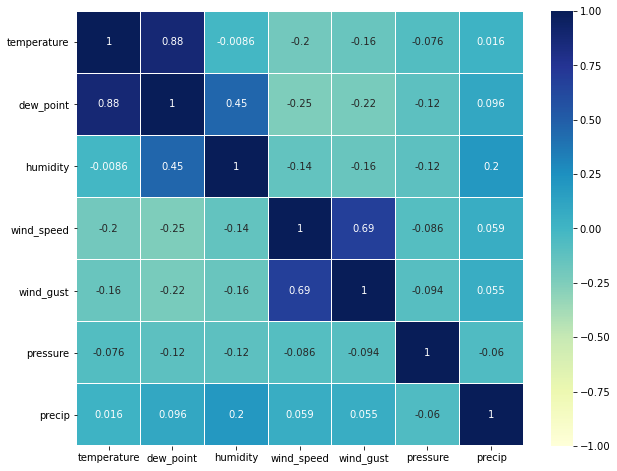

In [28]:
plt.subplots(figsize=(10,8))
sns.heatmap(df_w_2.corr(),linewidths=.01,annot=True,vmin=-1,vmax=1,cmap="YlGnBu")

<b>Different Weather Conditions </b>

In [29]:
print("Different Weather Conditions:\n", df_w_2['condition'].unique())

Different Weather Conditions:
 ['Fair' 'Partly Cloudy' 'Mostly Cloudy' 'Cloudy' 'Cloudy / Windy'
 'Partly Cloudy / Windy' 'Fair / Windy' 'Mostly Cloudy / Windy'
 'Light Rain' 'Wintry Mix' 'Heavy Rain' 'Rain' 'Light Drizzle'
 'Light Snow' 'Heavy Rain / Windy' 'Heavy T-Storm' 'Heavy T-Storm / Windy'
 'Fog' 'Light Drizzle / Windy' 'Light Rain with Thunder'
 'Light Rain / Windy' 'Rain and Snow / Windy' 'Rain and Snow' 'Haze'
 'Drizzle and Fog' 'Rain / Windy' 'Rain and Sleet'
 'Light Snow and Sleet / Windy' 'Light Snow and Sleet' 'Thunder' 'T-Storm'
 'T-Storm / Windy' 'Thunder / Windy' 'Snow and Sleet' 'Light Snow / Windy'
 'Snow' 'Light Freezing Rain' 'Rain / Freezing Rain' 'Heavy Snow'
 'Snow / Windy' 'Unknown Precipitation' 'Rain / Freezing Rain / Windy'
 'Rain and Sleet / Windy' 'Light Sleet' 'Sleet' 'Light Freezing Drizzle'
 'Light Sleet / Windy' 'Light Snow / Freezing Rain' 'Shallow Fog' nan
 'Heavy Snow / Windy' 'Haze / Windy' 'Thunder in the Vicinity'
 'Patches of Fog' 'Wintry Mix /

<hr><b>
Combining all weather data rows which were recorded during the same hour, by taking the average of the feature values.<br> <li> Using Pandasql & GROUP BY to incorporate this functionality. </b>

In [30]:
query = '''SELECT Weather_Datetime, AVG(temperature) as temperature, AVG(dew_point) as dew_point, 
AVG(humidity) as humidity, AVG(wind_speed) as wind_speed, AVG(wind_gust) as wind_gust, AVG(pressure) as pressure, AVG(precip) as precip,
group_concat(condition) as condition
FROM df_w_2
GROUP BY Weather_Datetime;
'''
df_w_3 = ps.sqldf(query).fillna("")
df_w_3['Weather_Datetime']=df_w_3['Weather_Datetime'].astype('datetime64[ns]')

In [31]:
df_w_3.dtypes

Weather_Datetime    datetime64[ns]
temperature                float64
dew_point                  float64
humidity                   float64
wind_speed                 float64
wind_gust                  float64
pressure                   float64
precip                     float64
condition                   object
dtype: object

<b>Some examples of weather dataset containing multiple rows for the same hour: </b>


In [32]:
df_w_3[df_w_3['condition'].str.contains(",")]

,Weather_Datetime,temperature,dew_point,humidity,wind_speed,wind_gust,pressure,precip,condition
261,2012-01-11 21:00:00,42.500000,33.500000,70.000000,12.000000,0.000000,29.915000,0.000000,"Cloudy,Cloudy"
264,2012-01-12 00:00:00,42.500000,37.500000,83.000000,14.000000,0.000000,29.785000,0.100000,"Cloudy,Cloudy"
265,2012-01-12 01:00:00,42.500000,39.000000,88.000000,15.500000,0.000000,29.760000,0.100000,"Cloudy,Cloudy"
268,2012-01-12 04:00:00,44.750000,42.750000,93.000000,17.500000,0.000000,29.597500,0.075000,"Cloudy,Cloudy,Cloudy,Cloudy"
269,2012-01-12 05:00:00,45.000000,43.000000,93.000000,21.500000,0.000000,29.530000,0.050000,"Cloudy / Windy,Cloudy / Windy"
...,...,...,...,...,...,...,...,...,...
86285,2021-11-12 11:00:00,65.000000,60.000000,84.000000,16.666667,29.666667,29.836667,0.033333,"Haze,Light Rain,Light Rain"
86286,2021-11-12 12:00:00,62.500000,56.500000,80.500000,12.000000,12.000000,29.830000,0.050000,"Light Rain,Heavy Rain"
86312,2021-11-13 14:00:00,57.000000,47.600000,71.400000,18.600000,28.000000,29.570000,0.100000,"Thunder in the Vicinity,Light Rain with Thunde..."
86313,2021-11-13 15:00:00,48.000000,38.500000,69.500000,33.000000,47.000000,29.670000,0.000000,"Mostly Cloudy / Windy,Light Rain / Windy"


<b>Adding a new column with a broader category for the weather conditions </b>

In [33]:
#df_condition=pd.read_csv("/content/drive/Shareddrives/CIS545 PROJECT/conditions.csv")
df_condition=pd.read_csv("conditions.csv")

In [34]:
df_condition.drop_duplicates(keep = 'first', inplace = True)
df_condition.reset_index(drop = True, inplace=True)

In [35]:
cond_dict = {}
for i in df_condition.index:
  if df_condition['broader_category'][i] in cond_dict:
    cond_dict[df_condition['broader_category'][i]].append(df_condition['condition'][i])
  else:
    cond_dict[df_condition['broader_category'][i]] = [df_condition['condition'][i]]

In [36]:
cond_dict

{'Fair': ['Fair'],
 'Cloudy': ['Partly Cloudy', 'Mostly Cloudy', 'Cloudy'],
 'Windy': ['Windy', 'Squalls'],
 'Rain': ['Light Rain',
  'Heavy Rain',
  'Rain',
  'Light Drizzle',
  'Light Freezing Rain',
  'Unknown Precipitation',
  'Light Freezing Drizzle',
  'Drizzle'],
 'Snow': ['Wintry Mix',
  'Light Snow',
  'Rain and Snow',
  'Rain and Sleet',
  'Light Snow and Sleet',
  'Snow and Sleet',
  'Snow',
  'Freezing Rain',
  'Heavy Snow',
  'Light Sleet',
  'Sleet',
  'Blowing Snow',
  'Small Hail'],
 'T-Storm': ['Heavy T-Storm',
  'Light Rain with Thunder',
  'Thunder',
  'T-Storm',
  'Thunder in the Vicinity',
  'Thunder and Hail'],
 'Fog': ['Fog',
  'Haze',
  'Drizzle and Fog',
  'Shallow Fog',
  'Patches of Fog',
  'Mist']}

<b>Adding a new columns with a broader category of weather conditions </b>

In [37]:
## Adding a new columns with a broader category of weather conditions
def get_categories(x):
  if any(cat in x for cat in cond_dict['Snow']):
    return 'Snow'
  elif any(cat in x for cat in cond_dict['T-Storm']):
    return 'T-Storm'
  elif any(cat in x for cat in cond_dict['Rain']):
    return 'Rain'
  elif any(cat in x for cat in cond_dict['Fog']):
    return 'Fog'
  elif any(cat in x for cat in cond_dict['Windy']):
    return 'Windy'
  elif any(cat in x for cat in cond_dict['Cloudy']):
    return 'Cloudy'
  elif any(cat in x for cat in cond_dict['Fair']):
    return 'Fair'

df_w_3['broader_condition'] = df_w_3['condition'].apply(get_categories)

In [38]:
df_w_3

,Weather_Datetime,temperature,dew_point,humidity,wind_speed,wind_gust,pressure,precip,condition,broader_condition
0,2012-01-01 00:00:00,46.0,37.0,71.0,12.0,0.0,30.01,0.0,Fair,Fair
1,2012-01-01 01:00:00,46.0,37.0,71.0,13.0,0.0,30.02,0.0,Fair,Fair
2,2012-01-01 02:00:00,46.0,37.0,71.0,10.0,0.0,30.03,0.0,Fair,Fair
3,2012-01-01 03:00:00,45.0,36.0,71.0,3.0,0.0,30.02,0.0,Fair,Fair
4,2012-01-01 04:00:00,44.0,36.0,73.0,0.0,0.0,30.02,0.0,Fair,Fair
...,...,...,...,...,...,...,...,...,...,...
86317,2021-11-13 19:00:00,45.0,29.0,53.0,16.0,24.0,29.79,0.0,Fair,Fair
86318,2021-11-13 20:00:00,44.0,28.0,53.0,16.0,0.0,29.82,0.0,Fair,Fair
86319,2021-11-13 21:00:00,44.0,27.0,51.0,15.0,0.0,29.85,0.0,Fair,Fair
86320,2021-11-13 22:00:00,44.0,27.0,51.0,18.0,32.0,29.86,0.0,Fair,Fair


In [39]:
df_w_2[df_w_2['Weather_Datetime']=="2021-11-13 14:00:00.000000"]

,Weather_Datetime,temperature,dew_point,humidity,wind_speed,wind_gust,pressure,precip,condition
101659,2021-11-13 14:00:00,62.0,50.0,65.0,15.0,26.0,29.53,0.0,Thunder in the Vicinity
101660,2021-11-13 14:00:00,62.0,50.0,65.0,20.0,26.0,29.56,0.0,Light Rain with Thunder
101661,2021-11-13 14:00:00,53.0,46.0,77.0,25.0,38.0,29.58,0.1,Heavy T-Storm / Windy
101662,2021-11-13 14:00:00,54.0,46.0,75.0,16.0,25.0,29.58,0.2,Light Rain with Thunder
101663,2021-11-13 14:00:00,54.0,46.0,75.0,17.0,25.0,29.60,0.2,Light Rain with Thunder


<hr>
<h1> PART 3: Joining Collision and Weather Dataset  </h1>

<h3>Joining using SQL via Pandasql</h3>
(Approximate Time Taken : 2m 47s)

In [40]:
query="""SELECT * 
FROM df_c_2 C LEFT JOIN df_w_3 W ON C.Collision_Datetime=W.Weather_Datetime"""
#df_combined=ps.sqldf(query)
#df_combined.head()

<h3>Joining via pd.merge</h3> 
(Approximate Time Taken : 7s )

In [41]:
df_combined_2=df_c_2.merge(df_w_3,how='left',left_on="Collision_Datetime",right_on="Weather_Datetime",indicator=True)
df_combined_2.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,NUMBER OF PERSONS INJURED,...,temperature,dew_point,humidity,wind_speed,wind_gust,pressure,precip,condition,broader_condition,_merge
0,04/13/2021,21:35,BROOKLYN,11217,40.683580,-73.97617,"(40.68358, -73.97617)",NaN,NaN,1.0,...,51.0,40.0,66.0,9.0,0.0,30.050,0.0,Partly Cloudy,Cloudy,both
1,05/21/2019,22:50,BROOKLYN,11201,40.697540,-73.98312,"(40.69754, -73.98312)",GOLD STREET,CONCORD STREET,0.0,...,62.0,36.0,38.0,18.0,23.0,30.080,0.0,Mostly Cloudy,Cloudy,both
2,02/26/2021,14:50,BRONX,10461,40.843464,-73.83600,"(40.843464, -73.836)",NaN,NaN,0.0,...,45.0,17.0,33.0,8.0,0.0,30.410,0.0,Mostly Cloudy,Cloudy,both
3,03/31/2021,22:20,BROOKLYN,11234,40.626457,-73.91800,"(40.626457, -73.918)",RALPH AVENUE,AVENUE K,1.0,...,57.5,55.0,91.5,5.5,0.0,29.785,0.1,"Light Rain,Light Rain",Rain,both
4,04/06/2021,22:58,STATEN ISLAND,10312,40.526894,-74.16728,"(40.526894, -74.16728)",BARCLAY AVENUE,HYLAN BOULEVARD,7.0,...,54.0,31.0,41.0,0.0,0.0,29.940,0.0,Partly Cloudy,Cloudy,both


In [42]:
df_combined_2.to_csv("CollisionWeatherData.csv")

In [43]:
df_not_matched=df_combined_2[df_combined_2['_merge']!="both"]
df_not_matched.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,NUMBER OF PERSONS INJURED,...,temperature,dew_point,humidity,wind_speed,wind_gust,pressure,precip,condition,broader_condition,_merge
15085,02/15/2021,6:10,QUEENS,11378,40.717360,-73.906400,"(40.71736, -73.9064)",59 DRIVE,60 STREET,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
15185,03/14/2021,23:40,BROOKLYN,11206,40.703680,-73.943375,"(40.70368, -73.943375)",NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
15782,02/16/2021,15:00,BRONX,10475,40.885014,-73.830215,"(40.885014, -73.830215)",NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
15814,02/15/2021,0:00,BROOKLYN,11210,40.627186,-73.943100,"(40.627186, -73.9431)",EAST 34 STREET,AVENUE J,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
16029,02/16/2021,15:00,QUEENS,11436,40.673847,-73.795715,"(40.673847, -73.795715)",ROCKAWAY BOULEVARD,143 STREET,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [44]:
print("Number of rows not matched:",df_not_matched.shape[0])

Number of rows not matched: 2133


<b>Dropping rows where corresponding weather data was not available </b>

In [45]:
df_cw=df_combined_2[df_combined_2['_merge']=="both"].reset_index(drop=True)
df_cw.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,NUMBER OF PERSONS INJURED,...,temperature,dew_point,humidity,wind_speed,wind_gust,pressure,precip,condition,broader_condition,_merge
0,04/13/2021,21:35,BROOKLYN,11217,40.683580,-73.97617,"(40.68358, -73.97617)",NaN,NaN,1.0,...,51.0,40.0,66.0,9.0,0.0,30.050,0.0,Partly Cloudy,Cloudy,both
1,05/21/2019,22:50,BROOKLYN,11201,40.697540,-73.98312,"(40.69754, -73.98312)",GOLD STREET,CONCORD STREET,0.0,...,62.0,36.0,38.0,18.0,23.0,30.080,0.0,Mostly Cloudy,Cloudy,both
2,02/26/2021,14:50,BRONX,10461,40.843464,-73.83600,"(40.843464, -73.836)",NaN,NaN,0.0,...,45.0,17.0,33.0,8.0,0.0,30.410,0.0,Mostly Cloudy,Cloudy,both
3,03/31/2021,22:20,BROOKLYN,11234,40.626457,-73.91800,"(40.626457, -73.918)",RALPH AVENUE,AVENUE K,1.0,...,57.5,55.0,91.5,5.5,0.0,29.785,0.1,"Light Rain,Light Rain",Rain,both
4,04/06/2021,22:58,STATEN ISLAND,10312,40.526894,-74.16728,"(40.526894, -74.16728)",BARCLAY AVENUE,HYLAN BOULEVARD,7.0,...,54.0,31.0,41.0,0.0,0.0,29.940,0.0,Partly Cloudy,Cloudy,both


In [46]:
df_cw.columns

#To clarify: Is Crash Date/Time needed after the availabilty of collision datetime rounded to hour

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
       'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
       'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
       'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED',
       'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'Collision_Datetime', 'Part_of_day', 'broader_contributing_factors',
       'Weather_Datetime', 'temperature', 'dew_point', 'humidity',
       'wind_speed', 'wind_gust', 'pressure', 'precip', 'condition',
       'broader_condition', '_merge'],
      dtype='object')

<b> Renaming Columns 

In [47]:
rename_dict = {'CRASH DATE' : 'Crash_date', 
               'CRASH TIME' : 'Crash_time', 
               'BOROUGH' : 'Borough', 
               'ZIP CODE' : 'Zip_code', 
               'LATITUDE' : 'Latitude',
               'LONGITUDE' : 'Longitude', 
               'LOCATION' : 'Location', 
               'ON STREET NAME' : 'On_street_name', 
               'CROSS STREET NAME' : 'Cross_street_name',
               'NUMBER OF PERSONS INJURED' : 'Num_person_injured', 
               'NUMBER OF PERSONS KILLED' : 'Num_person_killed',
               'NUMBER OF PEDESTRIANS INJURED' : 'Num_pedestrians_injured', 
               'NUMBER OF PEDESTRIANS KILLED' : 'Num_pedestrians_killed',
               'NUMBER OF CYCLIST INJURED' : 'Num_cyclist_injured', 
               'NUMBER OF CYCLIST KILLED' : 'Num_cyclist_killed',
               'NUMBER OF MOTORIST INJURED' : 'Number_motorist_injured', 
               'NUMBER OF MOTORIST KILLED' : 'Number_motorist_killed',
               'CONTRIBUTING FACTOR VEHICLE 1' : 'Contributing_factor_1', 
               'CONTRIBUTING FACTOR VEHICLE 2' : 'Contributing_factor_2',
               'COLLISION_ID' : 'Collision_id', 
               'VEHICLE TYPE CODE 1' : 'Vehicle_type_1', 
               'VEHICLE TYPE CODE 2' : 'Vehicle_type_2',
               'Collision_Datetime' : 'Collision_datetime', 
               'Part_of_day' : 'Part_of_day', 
               'broader_contributing_factors' : 'Broader_contributing_factors',
               'Weather_Datetime' : 'Weather_datetime', 
               'temperature' : 'Temperature', 
               'dew_point' : 'Dew_point', 
               'humidity' : 'Humidity',
               'wind_speed' : 'Wind_speed', 
               'wind_gust' : 'Wind_gust', 
               'pressure' : 'Pressure', 
               'precip' : 'Precipitation', 
               'condition' : 'Weather_condition',
               'broader_condition' : 'Broader_weather_condition'}

In [48]:
df_cw.rename(columns = rename_dict, inplace=True)

In [49]:
df_cw

,Crash_date,Crash_time,Borough,Zip_code,Latitude,Longitude,Location,On_street_name,Cross_street_name,Num_person_injured,...,Temperature,Dew_point,Humidity,Wind_speed,Wind_gust,Pressure,Precipitation,Weather_condition,Broader_weather_condition,_merge
0,04/13/2021,21:35,BROOKLYN,11217,40.683580,-73.976170,"(40.68358, -73.97617)",NaN,NaN,1.0,...,51.0,40.0,66.0,9.0,0.0,30.050,0.0,Partly Cloudy,Cloudy,both
1,05/21/2019,22:50,BROOKLYN,11201,40.697540,-73.983120,"(40.69754, -73.98312)",GOLD STREET,CONCORD STREET,0.0,...,62.0,36.0,38.0,18.0,23.0,30.080,0.0,Mostly Cloudy,Cloudy,both
2,02/26/2021,14:50,BRONX,10461,40.843464,-73.836000,"(40.843464, -73.836)",NaN,NaN,0.0,...,45.0,17.0,33.0,8.0,0.0,30.410,0.0,Mostly Cloudy,Cloudy,both
3,03/31/2021,22:20,BROOKLYN,11234,40.626457,-73.918000,"(40.626457, -73.918)",RALPH AVENUE,AVENUE K,1.0,...,57.5,55.0,91.5,5.5,0.0,29.785,0.1,"Light Rain,Light Rain",Rain,both
4,04/06/2021,22:58,STATEN ISLAND,10312,40.526894,-74.167280,"(40.526894, -74.16728)",BARCLAY AVENUE,HYLAN BOULEVARD,7.0,...,54.0,31.0,41.0,0.0,0.0,29.940,0.0,Partly Cloudy,Cloudy,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1226693,07/07/2012,17:35,BROOKLYN,11235,40.575802,-73.961137,"(40.5758019, -73.9611371)",BRIGHTON 6 STREET,BRIGHTWATER COURT,0.0,...,90.0,66.0,45.0,3.0,0.0,29.730,0.0,Mostly Cloudy,Cloudy,both
1226694,07/06/2012,15:09,MANHATTAN,10035,40.801235,-73.941815,"(40.8012354, -73.9418153)",EAST 119 STREET,PARK AVENUE,0.0,...,90.0,65.0,43.0,13.0,0.0,29.830,0.0,Fair,Fair,both
1226695,07/03/2012,17:30,QUEENS,11102,40.774711,-73.933386,"(40.7747112, -73.9333863)",27 AVENUE,4 STREET,2.0,...,84.0,61.0,46.0,13.0,0.0,29.820,0.0,Mostly Cloudy,Cloudy,both
1226696,07/01/2012,15:30,BROOKLYN,11236,40.645032,-73.919978,"(40.6450318, -73.9199775)",RALPH AVENUE,CLARENDON ROAD,0.0,...,96.0,63.0,33.0,18.0,24.0,29.730,0.0,Partly Cloudy,Cloudy,both


In [50]:
df_cw.columns

Index(['Crash_date', 'Crash_time', 'Borough', 'Zip_code', 'Latitude',
       'Longitude', 'Location', 'On_street_name', 'Cross_street_name',
       'Num_person_injured', 'Num_person_killed', 'Num_pedestrians_injured',
       'Num_pedestrians_killed', 'Num_cyclist_injured', 'Num_cyclist_killed',
       'Number_motorist_injured', 'Number_motorist_killed',
       'Contributing_factor_1', 'Contributing_factor_2', 'Collision_id',
       'Vehicle_type_1', 'Vehicle_type_2', 'Collision_datetime', 'Part_of_day',
       'Broader_contributing_factors', 'Weather_datetime', 'Temperature',
       'Dew_point', 'Humidity', 'Wind_speed', 'Wind_gust', 'Pressure',
       'Precipitation', 'Weather_condition', 'Broader_weather_condition',
       '_merge'],
      dtype='object')

In [51]:
drop_column_name = ['Weather_datetime', '_merge']
df_cw.drop(columns = drop_column_name, inplace=True)
df_cw

,Crash_date,Crash_time,Borough,Zip_code,Latitude,Longitude,Location,On_street_name,Cross_street_name,Num_person_injured,...,Broader_contributing_factors,Temperature,Dew_point,Humidity,Wind_speed,Wind_gust,Pressure,Precipitation,Weather_condition,Broader_weather_condition
0,04/13/2021,21:35,BROOKLYN,11217,40.683580,-73.976170,"(40.68358, -73.97617)",NaN,NaN,1.0,...,Unspecified,51.0,40.0,66.0,9.0,0.0,30.050,0.0,Partly Cloudy,Cloudy
1,05/21/2019,22:50,BROOKLYN,11201,40.697540,-73.983120,"(40.69754, -73.98312)",GOLD STREET,CONCORD STREET,0.0,...,Driver Negligence,62.0,36.0,38.0,18.0,23.0,30.080,0.0,Mostly Cloudy,Cloudy
2,02/26/2021,14:50,BRONX,10461,40.843464,-73.836000,"(40.843464, -73.836)",NaN,NaN,0.0,...,Unspecified,45.0,17.0,33.0,8.0,0.0,30.410,0.0,Mostly Cloudy,Cloudy
3,03/31/2021,22:20,BROOKLYN,11234,40.626457,-73.918000,"(40.626457, -73.918)",RALPH AVENUE,AVENUE K,1.0,...,Driver Negligence,57.5,55.0,91.5,5.5,0.0,29.785,0.1,"Light Rain,Light Rain",Rain
4,04/06/2021,22:58,STATEN ISLAND,10312,40.526894,-74.167280,"(40.526894, -74.16728)",BARCLAY AVENUE,HYLAN BOULEVARD,7.0,...,Driver Negligence,54.0,31.0,41.0,0.0,0.0,29.940,0.0,Partly Cloudy,Cloudy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1226693,07/07/2012,17:35,BROOKLYN,11235,40.575802,-73.961137,"(40.5758019, -73.9611371)",BRIGHTON 6 STREET,BRIGHTWATER COURT,0.0,...,Unspecified,90.0,66.0,45.0,3.0,0.0,29.730,0.0,Mostly Cloudy,Cloudy
1226694,07/06/2012,15:09,MANHATTAN,10035,40.801235,-73.941815,"(40.8012354, -73.9418153)",EAST 119 STREET,PARK AVENUE,0.0,...,Unspecified,90.0,65.0,43.0,13.0,0.0,29.830,0.0,Fair,Fair
1226695,07/03/2012,17:30,QUEENS,11102,40.774711,-73.933386,"(40.7747112, -73.9333863)",27 AVENUE,4 STREET,2.0,...,Driver Negligence,84.0,61.0,46.0,13.0,0.0,29.820,0.0,Mostly Cloudy,Cloudy
1226696,07/01/2012,15:30,BROOKLYN,11236,40.645032,-73.919978,"(40.6450318, -73.9199775)",RALPH AVENUE,CLARENDON ROAD,0.0,...,Unspecified,96.0,63.0,33.0,18.0,24.0,29.730,0.0,Partly Cloudy,Cloudy


<b> Merged Dataset ready for Analysis and Visualization </b>

In [52]:
df_cw.to_csv('Joined_accident_and_weather_data.csv', index = False)

In [53]:

df_cw

,Crash_date,Crash_time,Borough,Zip_code,Latitude,Longitude,Location,On_street_name,Cross_street_name,Num_person_injured,...,Broader_contributing_factors,Temperature,Dew_point,Humidity,Wind_speed,Wind_gust,Pressure,Precipitation,Weather_condition,Broader_weather_condition
0,04/13/2021,21:35,BROOKLYN,11217,40.683580,-73.976170,"(40.68358, -73.97617)",NaN,NaN,1.0,...,Unspecified,51.0,40.0,66.0,9.0,0.0,30.050,0.0,Partly Cloudy,Cloudy
1,05/21/2019,22:50,BROOKLYN,11201,40.697540,-73.983120,"(40.69754, -73.98312)",GOLD STREET,CONCORD STREET,0.0,...,Driver Negligence,62.0,36.0,38.0,18.0,23.0,30.080,0.0,Mostly Cloudy,Cloudy
2,02/26/2021,14:50,BRONX,10461,40.843464,-73.836000,"(40.843464, -73.836)",NaN,NaN,0.0,...,Unspecified,45.0,17.0,33.0,8.0,0.0,30.410,0.0,Mostly Cloudy,Cloudy
3,03/31/2021,22:20,BROOKLYN,11234,40.626457,-73.918000,"(40.626457, -73.918)",RALPH AVENUE,AVENUE K,1.0,...,Driver Negligence,57.5,55.0,91.5,5.5,0.0,29.785,0.1,"Light Rain,Light Rain",Rain
4,04/06/2021,22:58,STATEN ISLAND,10312,40.526894,-74.167280,"(40.526894, -74.16728)",BARCLAY AVENUE,HYLAN BOULEVARD,7.0,...,Driver Negligence,54.0,31.0,41.0,0.0,0.0,29.940,0.0,Partly Cloudy,Cloudy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1226693,07/07/2012,17:35,BROOKLYN,11235,40.575802,-73.961137,"(40.5758019, -73.9611371)",BRIGHTON 6 STREET,BRIGHTWATER COURT,0.0,...,Unspecified,90.0,66.0,45.0,3.0,0.0,29.730,0.0,Mostly Cloudy,Cloudy
1226694,07/06/2012,15:09,MANHATTAN,10035,40.801235,-73.941815,"(40.8012354, -73.9418153)",EAST 119 STREET,PARK AVENUE,0.0,...,Unspecified,90.0,65.0,43.0,13.0,0.0,29.830,0.0,Fair,Fair
1226695,07/03/2012,17:30,QUEENS,11102,40.774711,-73.933386,"(40.7747112, -73.9333863)",27 AVENUE,4 STREET,2.0,...,Driver Negligence,84.0,61.0,46.0,13.0,0.0,29.820,0.0,Mostly Cloudy,Cloudy
1226696,07/01/2012,15:30,BROOKLYN,11236,40.645032,-73.919978,"(40.6450318, -73.9199775)",RALPH AVENUE,CLARENDON ROAD,0.0,...,Unspecified,96.0,63.0,33.0,18.0,24.0,29.730,0.0,Partly Cloudy,Cloudy


In [54]:
df_cw.corr()

,Latitude,Longitude,Num_person_injured,Num_person_killed,Num_pedestrians_injured,Num_pedestrians_killed,Num_cyclist_injured,Num_cyclist_killed,Number_motorist_injured,Number_motorist_killed,Collision_id,Temperature,Dew_point,Humidity,Wind_speed,Wind_gust,Pressure,Precipitation
Latitude,1.000000,-0.997485,-0.004279,-0.000338,0.002915,-0.000925,-0.002017,0.000320,-0.004995,0.000416,-0.028568,0.001221,0.001218,-0.001093,0.003722,0.001739,-0.001639,0.001757
Longitude,-0.997485,1.000000,0.004246,0.000205,-0.002570,0.000873,0.000989,-0.000390,0.005089,-0.000527,0.030754,-0.001289,-0.001082,0.001436,-0.004157,-0.002124,0.001644,-0.001776
Num_person_injured,-0.004279,0.004246,1.000000,0.017721,0.319292,0.006544,0.197297,0.000900,0.891423,0.021157,0.015108,0.026118,0.030215,0.015056,-0.018051,-0.016640,-0.001117,0.004613
Num_person_killed,-0.000338,0.000205,0.017721,1.000000,0.012208,0.747299,-0.002974,0.304103,0.014970,0.605373,-0.002001,0.000289,0.002101,0.004058,-0.004135,-0.003351,-0.000403,-0.000282
Num_pedestrians_injured,0.002915,-0.002570,0.319292,0.012208,1.000000,0.016818,-0.035301,0.002335,-0.057642,-0.001206,-0.021027,-0.022261,-0.013606,0.018405,0.005149,0.004267,-0.000293,0.019002
Num_pedestrians_killed,-0.000925,0.000873,0.006544,0.747299,0.016818,1.000000,-0.002445,0.036989,0.000843,0.008123,-0.002731,-0.002672,-0.000965,0.003663,-0.002106,-0.001728,-0.000959,0.000511
Num_cyclist_injured,-0.002017,0.000989,0.197297,-0.002974,-0.035301,-0.002445,1.000000,0.002349,-0.046482,-0.003018,0.019494,0.059151,0.048768,-0.011838,-0.016811,-0.018080,-0.003960,-0.007533
Num_cyclist_killed,0.000320,-0.000390,0.000900,0.304103,0.002335,0.036989,0.002349,1.000000,-0.000619,-0.000178,0.002008,0.003388,0.003445,0.000615,-0.000968,-0.001556,0.000084,0.000225
Number_motorist_injured,-0.004995,0.005089,0.891423,0.014970,-0.057642,0.000843,-0.046482,-0.000619,1.000000,0.024264,0.017842,0.019931,0.023786,0.012022,-0.016677,-0.014332,0.000080,-0.000953
Number_motorist_killed,0.000416,-0.000527,0.021157,0.605373,-0.001206,0.008123,-0.003018,-0.000178,0.024264,1.000000,-0.001131,0.002145,0.003117,0.002146,-0.003649,-0.002742,0.000467,-0.001167


<AxesSubplot:>

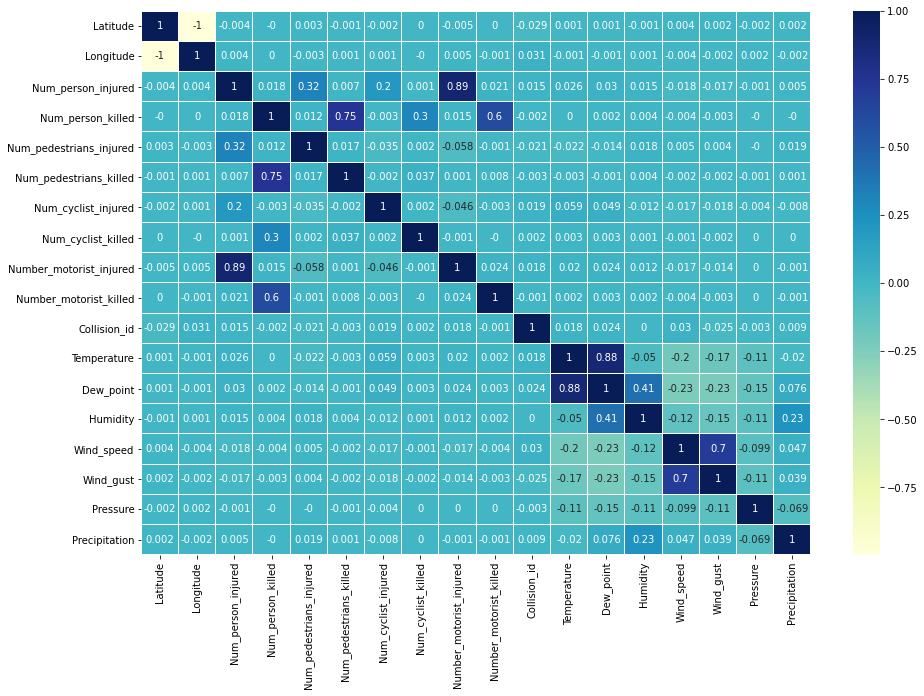

In [60]:
plt.figure(figsize=(15,10))
sns.heatmap(df_cw.corr().round(3), annot= True,linewidth=.1, cmap="YlGnBu")

<h3><b>For Next Part of the Project (Extensive EDA and Visualization) please refer - Visualization.ipynb</b></h3>